## Bar plots: 
* Display the distribution (frequencies) of a categorical variable through vertical or horizontal bars.
* Format: barplot(height) where height is a vector or a matrix
* TIP If the categorical variable to be plotted is a factor or ordered factor, you can create a vertical bar plot quickly with the plot() function. 
* Bar plots needn’t be based on counts or frequencies. You can create bar plots that represent means, medians, standard deviations, and so forth by using the aggregate function and passing the result to the Bar plot

Options           | Description
------------------|------------
horiz=TRUE        | Horizontal Bar Plot
beside = FALSE    | Stacked Bar plot - Each column of the matrix produces a bar in the plot, with the values in the column giving the heights of stacked “sub-bars.”
beside = TRUE     | Grouped Bar plot - Each column of the matrix represents a group, and the values in each column are juxtaposed rather than stacked.
cex.name          | To decrease the font size use the cex. names option . Specifying values smaller than 1 will shrink the size of the labels
names.arg         | Allows you to specify a character vector to change the name of the labels

## Pie Charts:
 * Format: pie(x, labels)
 * Fan chart - In a fan plot the slices rearranged to overlap each other and radii are modified so that each slice is visible

## Histogram:
* Displays distribution of continuous variable by dividing range of frequencies into specific number of bins on the X-axis, and displaying the frequency on the Y-axis
* Format: hist(x)
* Rug plot is a one dimensional representation of the actual data values. If there are many tied values, you can jitter the data on the rug plot using code like the following: rug(jitter(mpg, amount=0.01)). This This will add a small random value to each data point (a uniform random variate between ± amount), in order to avoid overlapping points.

Options          | Description
-----------------|-------------
breaks = (Number)| To specify the number of bins
freq = TRUE,FALSE| freq = FALSE gives a Density plot, while freq = True gives as Frequency plot
lines()          | To overlay the density plot with a density curve
rug()            | To rug plot
box()            | To put a box around the figure. Options: lty to choose line type and col to choose box color

## Kernel Density Plots:
* An effective way to view the distribution of a Continuous variable.
* Format: plot(density(x))
* In general Kernel density plots are superimposed on top of Density Histograms. To do this utilize lines() to superimposing a density curve on an existing graph.
* ploygon() is used to fill color inside the density curve
* Kernel density plots can be utilized to compare groups. 
     * The sm.density.compare() function in the sm package allows you to superimpose the kernel density plots of two or more groups. Format: sm.density.compare(x, factor) where x is a numeric vector and factor is a grouping variable.
     * Overlapping kernel density plots can be a powerful way to compare groups of observations on an outcome variable

## Box Plots:
* Describes the distribution of a continuous variable by plotting its five-number summary: the minimum, lower quartile (25th percentile), median (50th percentile), upper quartile (75th percentile), and maximum. 
* It can also display observations that may be outliers (values outside the range of ± 1.5*IQR, where IQR is the interquartile range defined as the upper quartile minus the lower quartile).
* Format: boxplot(x)
* boxplot.stats(x) can be used to print the statistics that builds the plot
* To create parallel box plots to compare groups: Format: boxplot(formula, data=dataframe)
    * Where formula is a formula and dataframe denotes the data frame (or list) providing the data.
    * Example of a formula is y ~ A, where a separate box plot for numeric variable y is generated for each value of categorical variable A. The formula y ~ A*B would produce a box plot of numeric variable y, for each combination of levels in categorical variables A and B.
* Options:
    * varwidth=TRUE will make the box plot widths proportional to the square root of their sample sizes. 
    * horizontal=TRUE to reverse the axis orientation.
    * notch=TRUE gives notched box plots. If two boxes’ notches don’t overlap, there’s strong evidence that their medians differ

## Dot Plots:
* Provides a method of plotting a large number of labeled values on a simple horizontal scale.
* Format: dotchart(x , labels=) where x is a numeric vector and labels specifies a vector that labels each point.
* 

In [69]:
library(grid)
library(vcd)

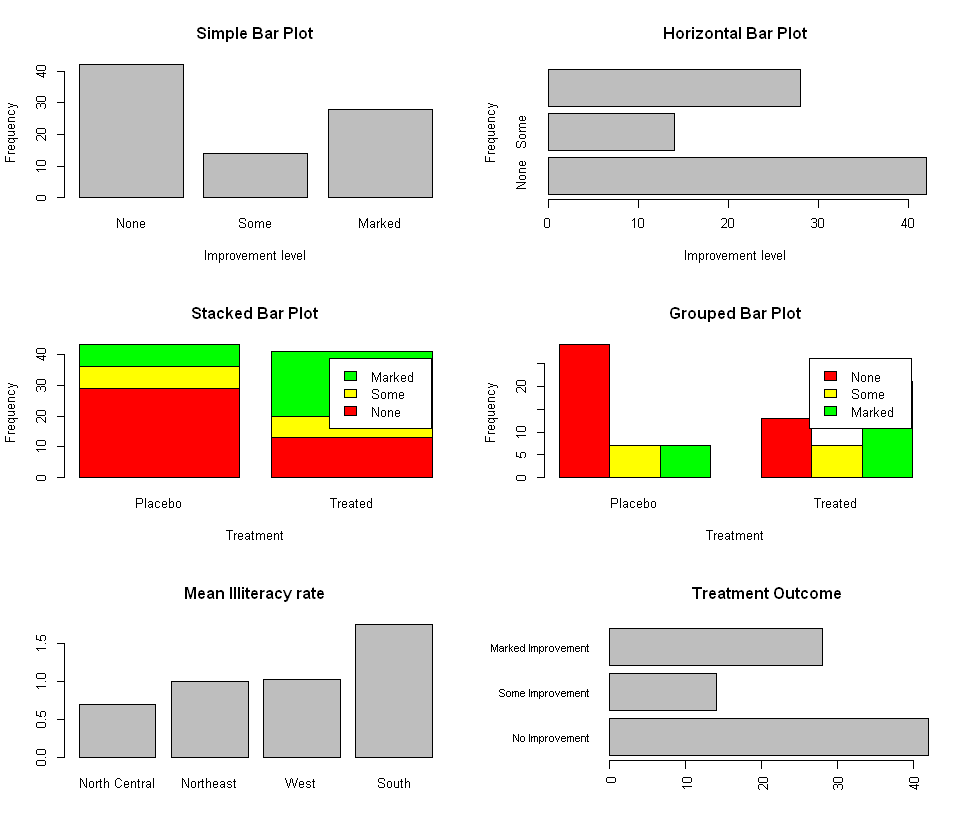

In [70]:
options(repr.plot.width=8, repr.plot.height=7)
count.treatment <- table(Arthritis$Treatment)
count.improved <- table(Arthritis$Improved)
counts <- table(Arthritis$Improved, Arthritis$Treatment)
par(mfrow = c(3,2))
barplot(count.improved ,
        main ="Simple Bar Plot",
        xlab = 'Improvement level' , ylab = 'Frequency' 
       )
barplot(count.improved ,
        main ="Horizontal Bar Plot",
        xlab = 'Improvement level' , ylab = 'Frequency' ,
        horiz = TRUE
       )
barplot(counts,
        main="Stacked Bar Plot",
        xlab="Treatment", ylab="Frequency",
        col=c("red", "yellow","green"),
        legend=rownames(counts),
        )
barplot(counts,
        main="Grouped Bar Plot",
        xlab="Treatment", ylab="Frequency",
        col=c("red", "yellow", "green"),
        legend=rownames(counts), beside=TRUE)
########Example of Mean Bar Plot##################
states <- data.frame(state.region,state.x77)
means <- aggregate(states$Illiteracy , by =list(state.region) , FUN=mean  )
means <- means[order(means$x),] # Means sorted smallest to largest
barplot(means$x , names.arg = means$Group.1 , main = "Mean Illiteracy rate")
#lines(means$x)
########Fitting Labels in Bar Plots##############
par(mar=c(5,8,4,2))
par(las=2)
counts <- table(Arthritis$Improved)
barplot(counts,
        main="Treatment Outcome",
        horiz=TRUE, cex.names=0.8,
        names.arg=c("No Improvement", "Some Improvement", "Marked Improvement"))

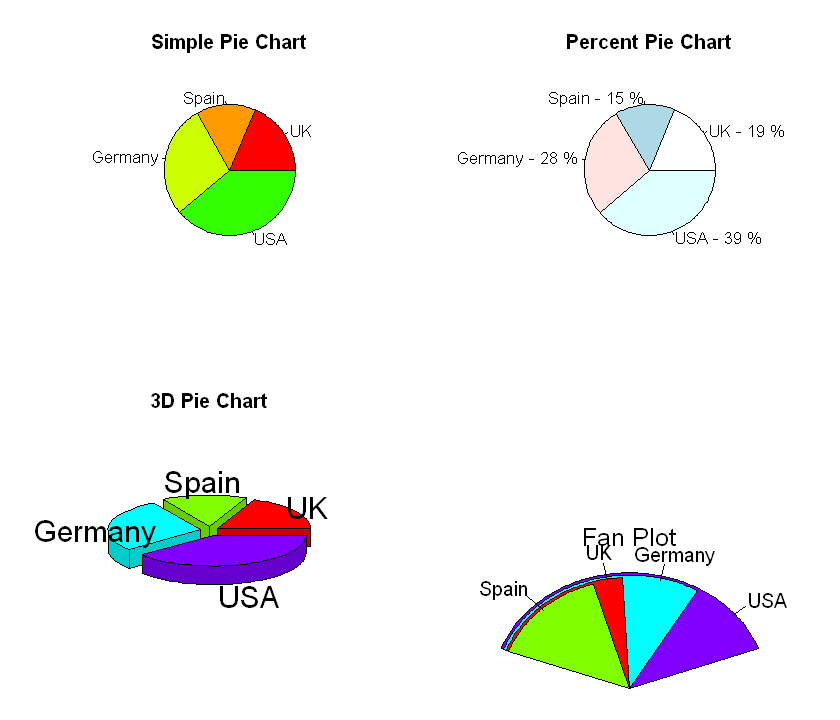

In [33]:
options(repr.plot.width=7, repr.plot.height=6)
par(mfrow = c(2,2))
slices <- c(10,8,15,21)
lbls <- c("UK" , "Spain" , "Germany" , "USA")
pie(slices , labels = lbls , main = "Simple Pie Chart" , col = rainbow(10))

pct <- round(slices/sum(slices)*100)
lbls2 <- paste(lbls , "-",pct, "%" )
pie(pct , lbls2, main ="Percent Pie Chart") 

library(plotrix)
pie3D(slices , labels = lbls , explode = 0.1 , main = "3D Pie Chart")

fan.plot(slices, labels = lbls , main = "Fan Plot" )


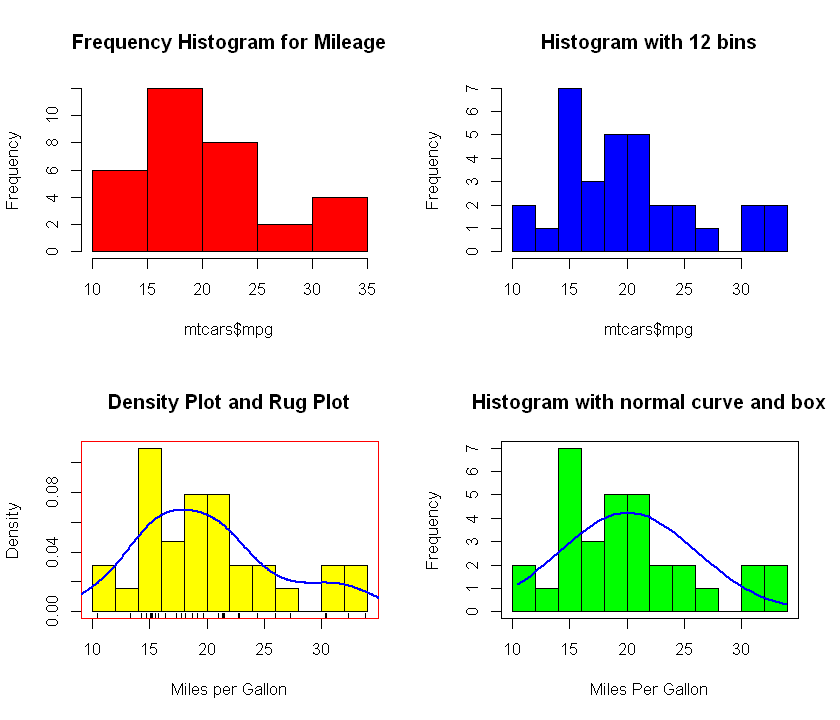

In [53]:
options(repr.plot.width=7, repr.plot.height=6)
par(mfrow = c(2,2))

hist(mtcars$mpg , col = "red" , main = "Frequency Histogram for Mileage")
hist(mtcars$mpg , breaks = 12 , col = "blue" , main = "Histogram with 12 bins")

hist(mtcars$mpg , breaks = 12 , freq = FALSE , col = "yellow" , 
     xlab = "Miles per Gallon" , main = "Density Plot and Rug Plot")
rug(jitter(mtcars$mpg))
box(lty = 1 , col = "red")
lines(density(mtcars$mpg), col="blue", lwd=2)

x <- mtcars$mpg
h <-hist(x, breaks=12, col="green", xlab="Miles Per Gallon", main="Histogram with normal curve and box")
xfit<-seq(min(x), max(x), length=40)
yfit<-dnorm(xfit, mean=mean(x), sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)   #To fit a normal curve on Histogram
box()

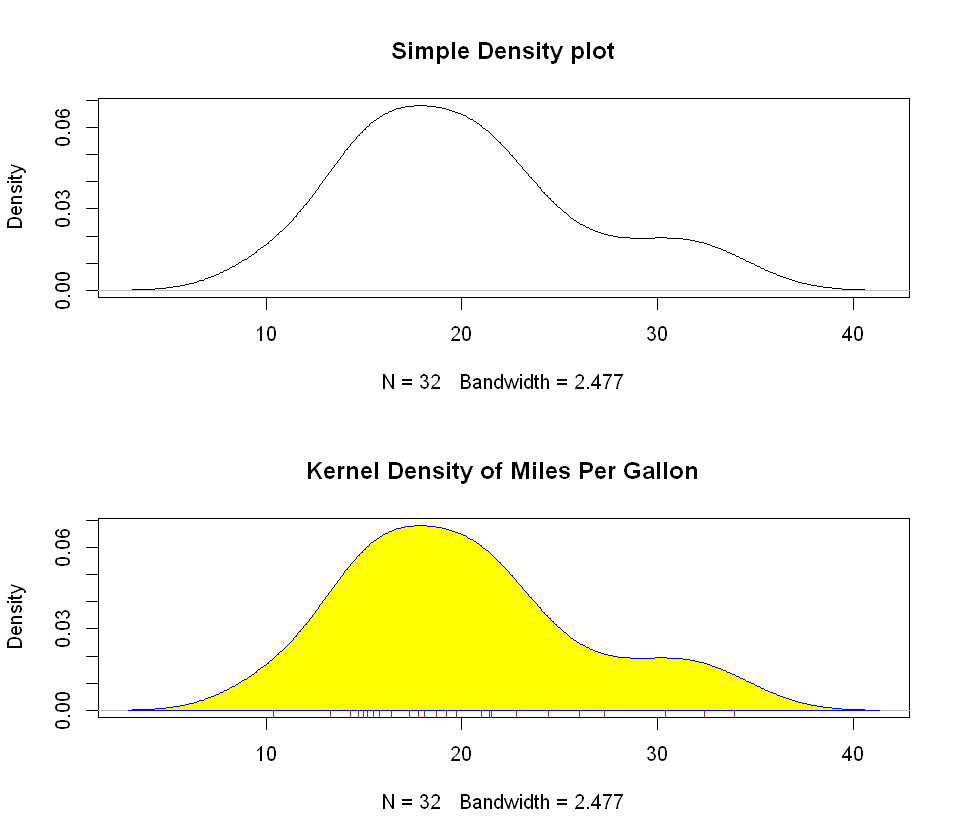

In [92]:
par(mfrow=c(2,1))
d <- density(mtcars$mpg)
plot(d , main ="Simple Density plot")                                    
plot(d, main="Kernel Density of Miles Per Gallon")
polygon(d, col="yellow", border="blue")     #Performs to fill inside the density plot
rug(mtcars$mpg, col="brown")

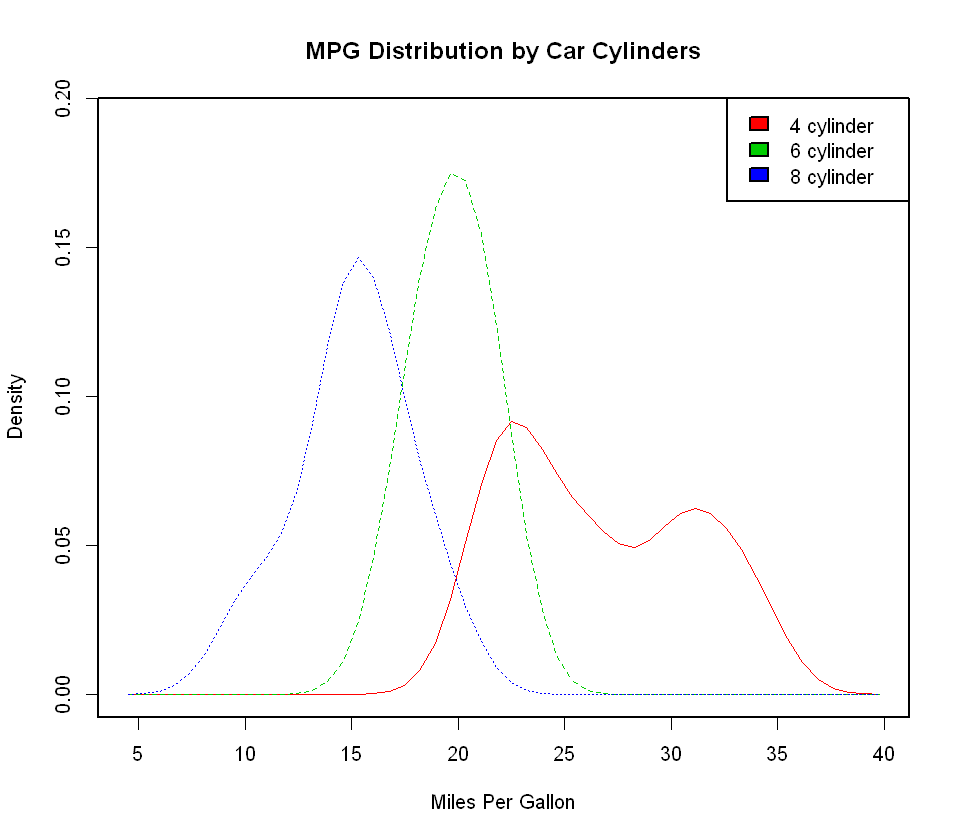

In [90]:
par(lwd=2)
#library(sm) 
cyl.f <- factor(mtcars$cyl, levels= c(4,6,8),
            labels = c("4 cylinder", "6 cylinder", "8 cylinder"))
sm.density.compare(mtcars$mpg, mtcars$cyl, xlab="Miles Per Gallon") 
title(main="MPG Distribution by Car Cylinders")
legend("topright", levels(cyl.f), fill=colfill) 

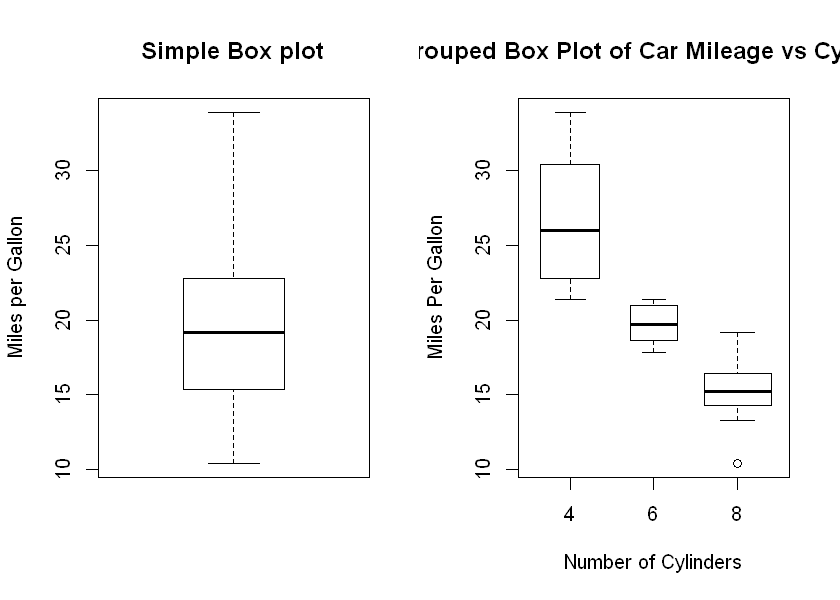

In [133]:
options(repr.plot.width=7, repr.plot.height=5)
par(mfrow = c(1,2))
boxplot(mtcars$mpg, main="Simple Box plot", ylab="Miles per Gallon")
#boxplot.stats(mtcars$mpg)  #Prints the statistics to build the graph.
boxplot(mtcars$mpg ~ mtcars$cyl, data=mtcars, 
            varwidth = TRUE , 
#            notch = TRUE ,   
#            horizontal = TRUE ,
            main="Grouped Box Plot of Car Mileage vs Cylinder",
            xlab="Number of Cylinders",
            ylab="Miles Per Gallon")

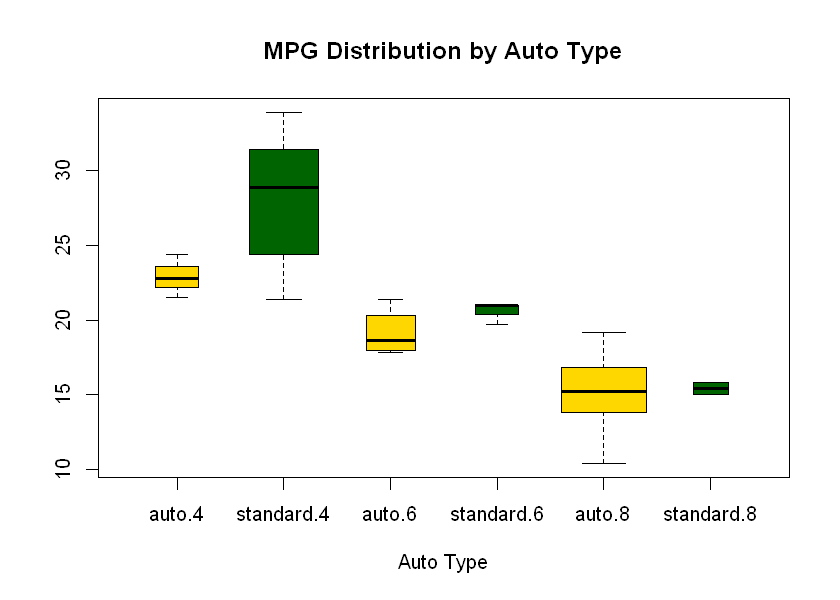

In [126]:
mtcars$cyl.f <- factor(mtcars$cyl,
    levels=c(4,6,8),
    labels=c("4","6","8"))
mtcars$am.f <- factor(mtcars$am,
    levels=c(0,1),
    labels=c("auto", "standard"))
boxplot(mpg ~ am.f *cyl.f,
    data=mtcars,
    varwidth=TRUE,
    col=c("gold","darkgreen"),
    main="MPG Distribution by Auto Type",
    xlab="Auto Type")